# Reshaping without MultiIndex

Files needed = (dogs.csv, Metro_Median_RentalPrice_1Bedroom.csv)

Our last notebook taught us about MultiIndex. The MultiIndex is a great way to organize our data and it provided an easy way to reshape our data: moving some variables from rows to columns and vice-versa. 

In this notebook, we learn about two related methods `pivot_table()` and `melt()` which allow us to reshape our data without using a MultiIndex. Sometimes, we want to reshape the data before we deal with indexing, and pivot and melt can save us some work.

In [2]:
import pandas as pd                 # load pandas and shorten it to pd
import datetime as dt               # load datetime and shorten it to dt
import matplotlib.pyplot as plt     # for making figures

## Panel data
Panel data have (at least) three dimensions, for example, a panel might record
1. several variables (income, age, spending on cheese)
2. regarding several people
3. over time

Let's revisit the data on my dogs --- this time, without MultiIndex.

In [83]:
# load a data file with the number of walks and snacks my dogs have had 
dogs = pd.read_csv('dogs.csv')         # data on the habits of my dogs
dogs


,dog,var,time,value
0,Buster,walk,10/1/2018,2
1,Buster,walk,10/2/2018,2
2,Buster,walk,10/3/2018,1
3,Buster,snacks,10/1/2018,4
4,Buster,snacks,10/2/2018,3
5,Buster,snacks,10/3/2018,4
6,Buster,snacks,10/4/2018,5
7,Su,walk,10/1/2018,2
8,Su,walk,10/2/2018,2
9,Su,walk,10/3/2018,2


This data format is called **long** because there are lots of rows and not many columns. Moving between long and **wide** (lots of columns, fewer rows) is a common task in setting up panel data sets. 

Pandas calls long data **stacked** and wide data **unstacked**.

**With a MultiIndex:**
 We use the `stack()` and `unstack()` methods for moving between long and wide with MultiIndexed data. Stack and unstack do not work in place. They always return a copy, so we need to assign it to variables.

**Without a MultiIndex:**
We use the `pivot_table()` and `melt()` methods to move between long and wide data.

### From long to wide
We start by pivoting the data to wide from long (the [docs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot.html#pandas.DataFrame.pivot)). It moves rows into columns.

Instead of referencing indexes, we are referencing columns in the long data. We tell pivot_table which column will be the index of the wide data, which columns will be the columns of the wide data, and which column hold the values of the columns. 

In [85]:
# Make time variables datetime objects. Always a good practice.
dogs['time'] = pd.to_datetime(dogs['time'])

# Make th 
dogs_wide = dogs.pivot_table(index='time', columns=['dog', 'var'], values='value')
dogs_wide

dog        Buster          Su     
var        snacks walk snacks walk
time                              
2018-10-01    4.0  2.0    3.0  2.0
2018-10-02    3.0  2.0    4.0  2.0
2018-10-03    4.0  1.0    4.0  2.0
2018-10-04    5.0  NaN    3.0  NaN

A nice result. We basically jumped right to a panel. Notice that the order in which we pass columns determines the level of the MultiIndex. 

Now that I have a MultiIndexed 'wide' DataFrame, I turn it into a 'long' DataFrame frame using `stack()`, since `stack()` knows what to do with multiple indexes. 

In [22]:
dogs_long = dogs_wide.stack(['dog', 'var'])
dogs_long

time        dog     var   
2018-10-01  Buster  snacks    4.0
                    walk      2.0
            Su      snacks    3.0
                    walk      2.0
2018-10-02  Buster  snacks    3.0
                    walk      2.0
            Su      snacks    4.0
                    walk      2.0
2018-10-03  Buster  snacks    4.0
                    walk      1.0
            Su      snacks    4.0
                    walk      2.0
2018-10-04  Buster  snacks    5.0
            Su      snacks    3.0
dtype: float64

### From wide to long
The `melt()` method gets us from a wide DataFrame to a long DataFrame (the [docs](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.melt.html#pandas.DataFrame.melt)). It moves columns into rows.

Let's use the data from Zillow on one bedroom rental prices by metro area, 'Metro_Median_RentalPrice_1Bedroom.csv'.

In [51]:
onebeds = pd.read_csv('Metro_MedianRentalPrice_1Bedroom.csv')
onebeds.head()

,RegionName,SizeRank,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08
0,United States,0,NaN,1200.0,1245.0,1200.0,1250.0,1200.0,1200.0,1044.0,...,1400.0,1400.0,1400.0,1405.0,1425.0,1434.0,1450.0,1450.0,1460.0,1460.0
1,"New York, NY",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2095.0,2050.0,2050.0,2085.0,2100.0,2135.0,2150.0,2192.0,2155.0,2153.0
2,"Los Angeles, CA",2,NaN,1380.0,1425.0,1420.0,1437.5,1550.0,1600.0,1388.0,...,1961.0,1947.0,1930.0,1950.0,1960.0,1950.0,1995.0,2026.0,2050.0,2095.0
3,"Chicago, IL",3,NaN,1050.0,1100.0,1050.0,1075.0,995.0,950.0,1090.0,...,1525.0,1495.0,1477.0,1495.0,1495.0,1495.0,1495.0,1495.0,1500.0,1500.0
4,"Dallas, TX",4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.0,...,1217.0,1205.0,1200.0,1242.0,1235.0,1235.0,1252.0,1255.0,1267.0,1266.0


These data are wide. There is only one variable here: the median rental price of a one bedroom apartment. 

Use `melt()` to create a long DataFrame. We provide melt with the id_vars, which tell it the variables to group the data by. 

In [52]:
onebeds_long = onebeds.melt(id_vars=['RegionName', 'SizeRank']) 
onebeds_long.head()


,RegionName,SizeRank,variable,value
0,United States,0,2010-02,NaN
1,"New York, NY",1,2010-02,NaN
2,"Los Angeles, CA",2,2010-02,NaN
3,"Chicago, IL",3,2010-02,NaN
4,"Dallas, TX",4,2010-02,NaN


I'm a little surprised this didn't create a MultiIndex on the row axis, like pivot( ) did on the column axis above. We can certainly turn it into a MultiIndex... 

In [53]:
onebeds_long.set_index(['RegionName', 'variable'], inplace=True)
onebeds_long.head()

,,SizeRank,value
RegionName,variable,,
United States,2010-02,0,NaN
"New York, NY",2010-02,1,NaN
"Los Angeles, CA",2010-02,2,NaN
"Chicago, IL",2010-02,3,NaN
"Dallas, TX",2010-02,4,NaN


In [61]:
# might as well clean up the column names
onebeds_long.rename(columns={'value':'onebed_price', 'SizeRank':'size_rank'}, inplace=True)
onebeds_long.head()

,,size_rank,onebed_price
region,date,,
United States,2010-02,0,NaN
"New York, NY",2010-02,1,NaN
"Los Angeles, CA",2010-02,2,NaN
"Chicago, IL",2010-02,3,NaN
"Dallas, TX",2010-02,4,NaN


In [62]:
# and the index names
onebeds_long.index.set_names('region', level=0, inplace=True)
onebeds_long.index.set_names('date', level=1, inplace=True)
onebeds_long.head()

,,size_rank,onebed_price
region,date,,
United States,2010-02,0,NaN
"New York, NY",2010-02,1,NaN
"Los Angeles, CA",2010-02,2,NaN
"Chicago, IL",2010-02,3,NaN
"Dallas, TX",2010-02,4,NaN


Now there is a nice and clean dataset. 

## Practice

Let's try some more reshaping. Take a few minutes and try the following. Feel free to chat with those around if you get stuck. The TA and I are here, too.

1. Load 'broadband.csv'. The file contains gdp per capita and broadband penetration data for several countries. Are the data long or wide?

In [89]:
bb = pd.read_csv('broadband.csv')
bb.head(10)

,country,series,value
0,Switzerland,broadband,46.77000
1,Switzerland,gdppc,64834.80053
2,Denmark,broadband,42.92300
3,Denmark,gdppc,51495.56007
4,France,broadband,42.84300
5,France,gdppc,42858.45494
6,Netherlands,broadband,42.12600
7,Netherlands,gdppc,52799.14951
8,Korea,broadband,41.20000
9,Korea,gdppc,38350.32339


2. Set country and series as the index.

In [78]:
bb = bb.set_index(['country', 'series'])
bb.head()

value
country     series                
Switzerland broadband     46.77000
            gdppc      64834.80053
Denmark     broadband     42.92300
            gdppc      51495.56007
France      broadband     42.84300

3. Create a DataFrame with broadband and gdppc as columns, country as rows.

In [79]:
bb = bb.unstack()
bb.head()

value             
series    broadband        gdppc
country                         
Australia    31.796  50588.14949
Austria      28.543  52467.52700
Belgium      38.588  47941.66117
Canada       37.847  46704.89203
Chile        16.515  24012.91487

4. Reload the broadband data file to a new DataFrame.
5. Create the DataFrame you have for part 3., but do it using melt or pivot_table.

In [90]:
bb2 = pd.read_csv('broadband.csv')
bb2 = bb2.pivot_table(index=['country'], columns=['series'], values = 'value')
bb2.head(10)

series,broadband,gdppc
country,,
Australia,31.796,50588.14949
Austria,28.543,52467.52700
Belgium,38.588,47941.66117
Canada,37.847,46704.89203
Chile,16.515,24012.91487
Colombia,12.821,14485.30586
Czech Republic,29.636,36350.10463
Denmark,42.923,51495.56007
Estonia,29.824,31739.11999


6. Make a scatter plot of gdp per capita against broadband penetration.

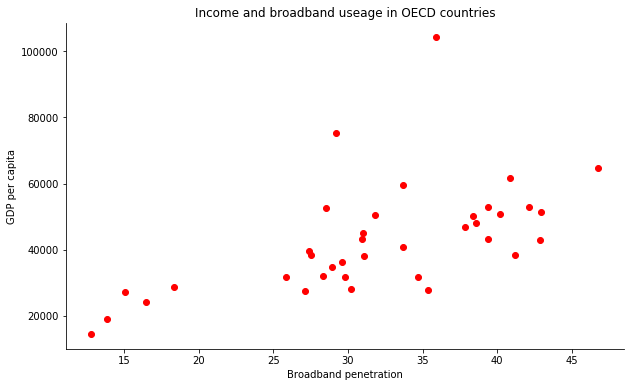

In [103]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(bb2['broadband'], bb2['gdppc'], color='red')

ax.set_ylabel('GDP per capita')
ax.set_xlabel('Broadband penetration')
ax.set_title('Income and broadband useage in OECD countries')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

7. Save your DataFrame as 'broadband_wide.csv'

In [104]:
bb2.to_csv('broadband_wide.csv')

8. Read 'broadband_wide.csv' into a DataFrame named `bb_wide`

In [107]:
bb_wide = pd.read_csv('broadband_wide.csv')
bb_wide.head()

,country,broadband,gdppc
0,Australia,31.796,50588.14949
1,Austria,28.543,52467.52700
2,Belgium,38.588,47941.66117
3,Canada,37.847,46704.89203
4,Chile,16.515,24012.91487


9. Turn bb_wide into a long dataset using pivot_table/melt

In [113]:
bb_long = bb_wide.melt(id_vars=['country'])
bb_long.head()

,country,variable,value
0,Australia,broadband,31.796
1,Austria,broadband,28.543
2,Belgium,broadband,38.588
3,Canada,broadband,37.847
4,Chile,broadband,16.515
